<a href="https://colab.research.google.com/github/ayushman2005-glitch/algo-lab/blob/main/Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Divide and Conquer (Sorting)

- **Created by Dr. Ajay

Write a python program to perform **Countingsort**.
* Statement:  Given a disordered list of repeated integers, rearrange the integers in natural order.
 Sample Input: [4,3,2,1,4,3,2,4,3,4]
 Sample Output: [1,2,2,3,3,3,4,4,4,4]

Time Complexity of Solution: Best Case O(n+k); Average Case O(n+k); Worst Case O(n+k), where n is the size of the input array and k means the values range from 0 to k.
- Approach:
Counting sort, like radix sort and bucket sort, is an integer based algorithm (i.e. the values of the input array are assumed to be integers). Hence counting sort is among the fastest sorting algorithms around, in theory. The  particular distinction for counting sort is that it creates a bucket for each value and keep a counter in each bucket. Then each time a value is encountered in the input collection, the appropriate counter is incremented. Because counting sort creates a bucket for each value, an imposing restriction is that the maximum value in the input array be known beforehand. Bucket sort uses a hash function to distribute values; counting sort, on the other hand, creates a counter for each value -- hence the name.
- Implementation notes:
1. Since the values range from 0 to k, create k+1 buckets.

2. To fill the buckets, iterate through the input list and
each time a value appears, increment the counter in its bucket.
3. Now fill the input list with the compressed data in the
buckets. Each bucket's key represents a value in the  array. So for each bucket, from smallest key to largest, add the index of the bucket to the input array and decrease the counter in said bucket by one; until the counter is zero.

Sample Input: [4, 3, 2, 1, 4, 3, 2, 4, 3, 4]
Sample Output: [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]
Expected Output: [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]

Measuring time with varying input sizes:
n = 1000, time = 0.000475 seconds
n = 5000, time = 0.002054 seconds
n = 10000, time = 0.002884 seconds
n = 20000, time = 0.005000 seconds
n = 50000, time = 0.013758 seconds
n = 100000, time = 0.033310 seconds


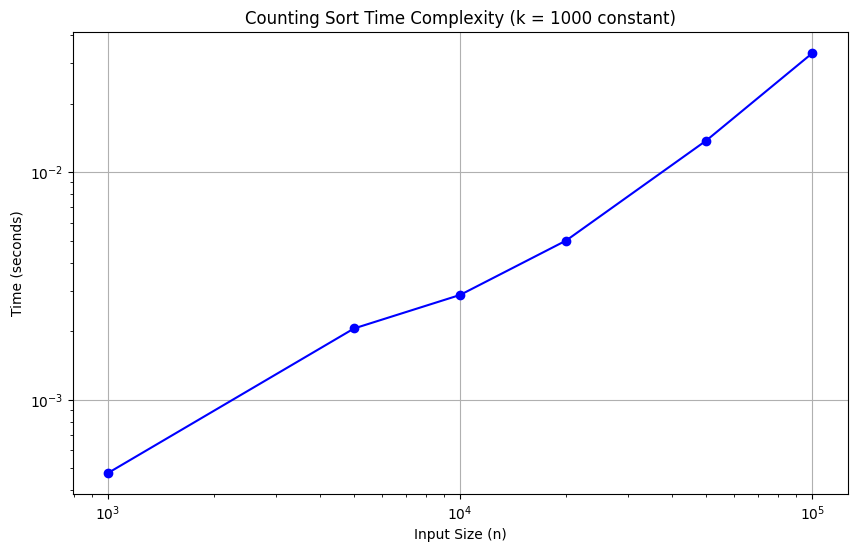


Measuring time with varying k values:
k = 100, time = 0.026268 seconds
k = 500, time = 0.026835 seconds
k = 1000, time = 0.027885 seconds
k = 5000, time = 0.033371 seconds
k = 10000, time = 0.015213 seconds
k = 20000, time = 0.019225 seconds


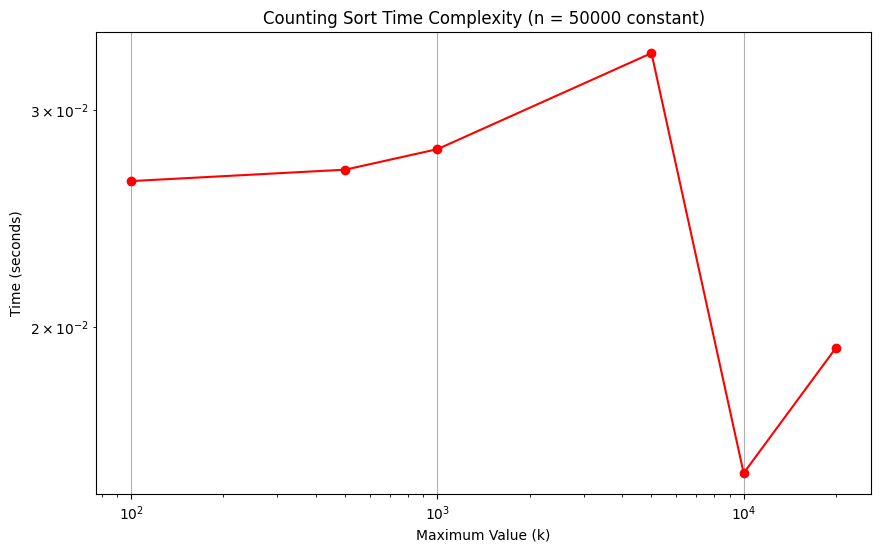

In [1]:
import time
import matplotlib.pyplot as plt
import random

def countingsort(arr, k):
    n = len(arr)
    output = [0] * n
    count = [0] * (k + 1)

    for num in arr:
        count[num] += 1

    for i in range(1, k + 1):
        count[i] += count[i - 1]

    for i in range(n - 1, -1, -1):
        output[count[arr[i]] - 1] = arr[i]
        count[arr[i]] -= 1

    for i in range(n):
        arr[i] = output[i]
    return arr

sample_input = [4, 3, 2, 1, 4, 3, 2, 4, 3, 4]

k_sample = max(sample_input)
sorted_sample = countingsort(list(sample_input), k_sample)
print(f"Sample Input: {sample_input}")
print(f"Sample Output: {sorted_sample}")
print(f"Expected Output: [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]")

def measure_time(sort_func, arr, k):
    start_time = time.time()
    sort_func(list(arr), k)
    end_time = time.time()
    return end_time - start_time

input_sizes = [1000, 5000, 10000, 20000, 50000, 100000]
k_constant = 1000
times_n = []

print("\nMeasuring time with varying input sizes:")
for n in input_sizes:
    data = [random.randint(0, k_constant) for _ in range(n)]
    time_taken = measure_time(countingsort, data, k_constant)
    times_n.append(time_taken)
    print(f"n = {n}, time = {time_taken:.6f} seconds")

plt.figure(figsize=(10, 6))
plt.plot(input_sizes, times_n, marker='o', linestyle='-', color='blue')
plt.title(f'Counting Sort Time Complexity (k = {k_constant} constant)')
plt.xlabel('Input Size (n)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.show()

constant_n = 50000
k_values = [100, 500, 1000, 5000, 10000, 20000]
times_k = []

print("\nMeasuring time with varying k values:")
for k_val in k_values:
    data = [random.randint(0, k_val) for _ in range(constant_n)]
    time_taken = measure_time(countingsort, data, k_val)
    times_k.append(time_taken)
    print(f"k = {k_val}, time = {time_taken:.6f} seconds")

plt.figure(figsize=(10, 6))
plt.plot(k_values, times_k, marker='o', linestyle='-', color='red')
plt.title(f'Counting Sort Time Complexity (n = {constant_n} constant)')
plt.xlabel('Maximum Value (k)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.show()


 - *Bucketsort*
Statement:
Given a disordered list of integers, rearrange them in natural order.
 Sample Input: [8,5,3,1,9,6,0,7,4,2,5]
 Sample Output: [0,1,2,3,4,5,6,7,8,9,5]
Time Complexity of Solution:
Best Case O(n); Average Case O(n); Worst Case O(n).
- Approach:
If it sounds too good to be true, then most likely it's not true. Bucketsort is not an exception to this adage. For bucketsort to
work at its blazing efficiency, there are multiple prerequisites.
First the hash function that is used to partition the elements need
to be very good and must produce ordered hash: if i < k then
hash(i) < hash(k). Second, the elements to be sorted must be
uniformly distributed.
  The aforementioned aside, bucket sort is actually very good
considering that counting sort is reasonably speaking its upper
bound. And counting sort is very fast. The particular distinction
for bucket sort is that it uses a hash function to partition the
keys of the input array, so that multiple keys may hash to the same
bucket. Hence each bucket must effectively be a growable list;
similar to radix sort.


Bucket Sort Sample Input: [8, 5, 3, 1, 9, 6, 0, 7, 4, 2, 5]
Bucket Sort Sample Output: [0, 1, 2, 3, 4, 5, 5, 6, 7, 8, 9]
Bucket Sort Expected Output: [0, 1, 2, 3, 4, 5, 5, 6, 7, 8, 9]

Measuring Bucket Sort time with varying input sizes:
n = 1000, time = 0.000475 seconds
n = 5000, time = 0.002751 seconds
n = 10000, time = 0.005091 seconds
n = 20000, time = 0.010067 seconds
n = 50000, time = 0.028253 seconds
n = 100000, time = 0.054925 seconds


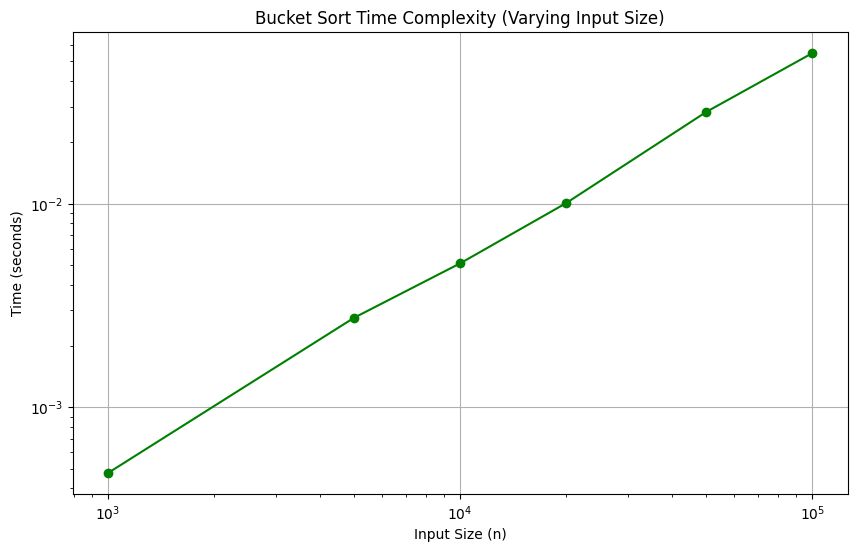


Measuring Bucket Sort time with varying value ranges (fixed n):
Max Value = 100, time = 0.026489 seconds
Max Value = 500, time = 0.025473 seconds
Max Value = 1000, time = 0.027004 seconds
Max Value = 5000, time = 0.026227 seconds
Max Value = 10000, time = 0.029442 seconds
Max Value = 20000, time = 0.026928 seconds


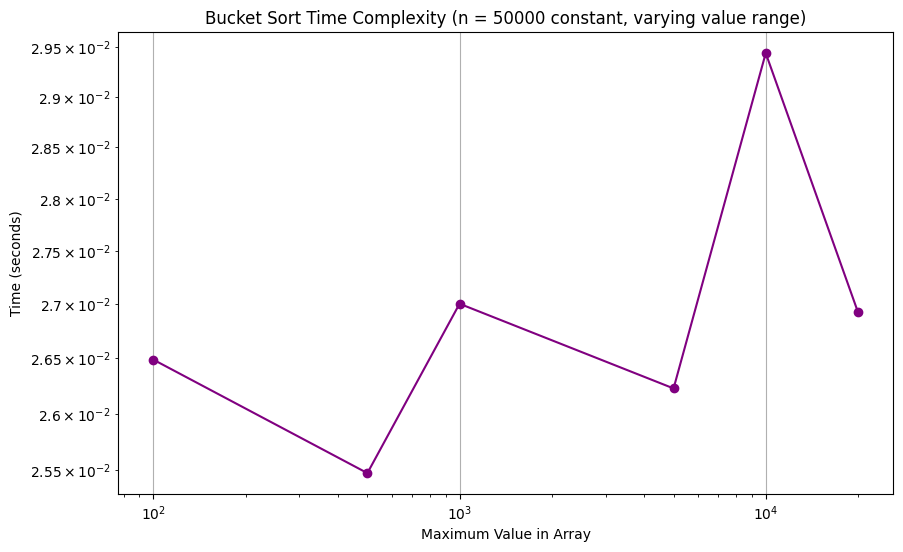

In [2]:
import time
import matplotlib.pyplot as plt
import random

def bucketsort(arr):

    if not arr:
        return []

    min_val = min(arr)
    max_val = max(arr)
    range_val = max_val - min_val

    if range_val == 0:
        return arr

    num_buckets = 10

    buckets = [[] for _ in range(num_buckets)]

    for num in arr:
        bucket_index = min(int((num - min_val) / range_val * (num_buckets - 1)), num_buckets - 1)
        buckets[bucket_index].append(num)

    sorted_arr = []
    for bucket in buckets:

        bucket.sort()
        sorted_arr.extend(bucket)
    return sorted_arr

sample_input_bucket = [8, 5, 3, 1, 9, 6, 0, 7, 4, 2, 5]
sorted_sample_bucket = bucketsort(list(sample_input_bucket))
print(f"Bucket Sort Sample Input: {sample_input_bucket}")
print(f"Bucket Sort Sample Output: {sorted_sample_bucket}")
print(f"Bucket Sort Expected Output: {sorted(sample_input_bucket)}")

def measure_time_bucketsort(sort_func, arr):
    start_time = time.time()
    sort_func(list(arr))
    end_time = time.time()
    return end_time - start_time

input_sizes_bucket = [1000, 5000, 10000, 20000, 50000, 100000]
times_n_bucket = []

print("\nMeasuring Bucket Sort time with varying input sizes:")
for n in input_sizes_bucket:
    data_bucket = [random.randint(0, 1000) for _ in range(n)]
    time_taken_bucket = measure_time_bucketsort(bucketsort, data_bucket)
    times_n_bucket.append(time_taken_bucket)
    print(f"n = {n}, time = {time_taken_bucket:.6f} seconds")

plt.figure(figsize=(10, 6))
plt.plot(input_sizes_bucket, times_n_bucket, marker='o', linestyle='-', color='green')
plt.title('Bucket Sort Time Complexity (Varying Input Size)')
plt.xlabel('Input Size (n)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.show()

constant_n_bucket = 50000
max_val_ranges = [100, 500, 1000, 5000, 10000, 20000]
times_range_bucket = []

print("\nMeasuring Bucket Sort time with varying value ranges (fixed n):")
for max_val in max_val_ranges:
    data_range_bucket = [random.randint(0, max_val) for _ in range(constant_n_bucket)]
    time_taken_range_bucket = measure_time_bucketsort(bucketsort, data_range_bucket)
    times_range_bucket.append(time_taken_range_bucket)
    print(f"Max Value = {max_val}, time = {time_taken_range_bucket:.6f} seconds")

plt.figure(figsize=(10, 6))
plt.plot(max_val_ranges, times_range_bucket, marker='o', linestyle='-', color='purple')
plt.title(f'Bucket Sort Time Complexity (n = {constant_n_bucket} constant, varying value range)')
plt.xlabel('Maximum Value in Array')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.show()

**Radix sort**
Statement:Given a disordered list of integers, rearrange them in natural order.
Sample Input: [18,5,100,3,1,19,6,0,7,4,2]
Sample Output: [0,1,2,3,4,5,6,7,18,19,100]
Time Complexity of Solution:Best Case O(kn); Average Case O(kn); Worst Case O(kn),where k is the length of the longest number and n is the size of the input array.Note: if k is greater than log(n) then an nlog(n) algorithm would be a better fit. In reality we can always change the radix to make k less than log(n).
- Approach: radix sort, like counting sort and bucket sort, is an integer based algorithm (i.e. the values of the input array are assumed to be integers). Hence radix sort is among the fastest sorting algorithms around, in theory. The particular distinction for radix sort is that it creates a bucket for each cipher (i.e. digit); as such, similar to bucket sort, each bucket in radix sort must be a
growable list that may admit different keys. For decimal values, the number of buckets is 10, as the decimal system has 10 numerals/cyphers (i.e. 0,1,2,3,4,5,6,7,8,9). Then the keys are continuously sorted by significant digits.

Radix Sort Sample Input: [18, 5, 100, 3, 1, 19, 6, 0, 7, 4, 2]
Radix Sort Sample Output: [0, 1, 2, 3, 4, 5, 6, 7, 18, 19, 100]
Radix Sort Expected Output: [0, 1, 2, 3, 4, 5, 6, 7, 18, 19, 100]

Measuring Radix Sort time with varying input sizes:
n = 1000, time = 0.002631 seconds
n = 5000, time = 0.018564 seconds
n = 10000, time = 0.018192 seconds
n = 20000, time = 0.038027 seconds
n = 50000, time = 0.126776 seconds
n = 100000, time = 0.267747 seconds


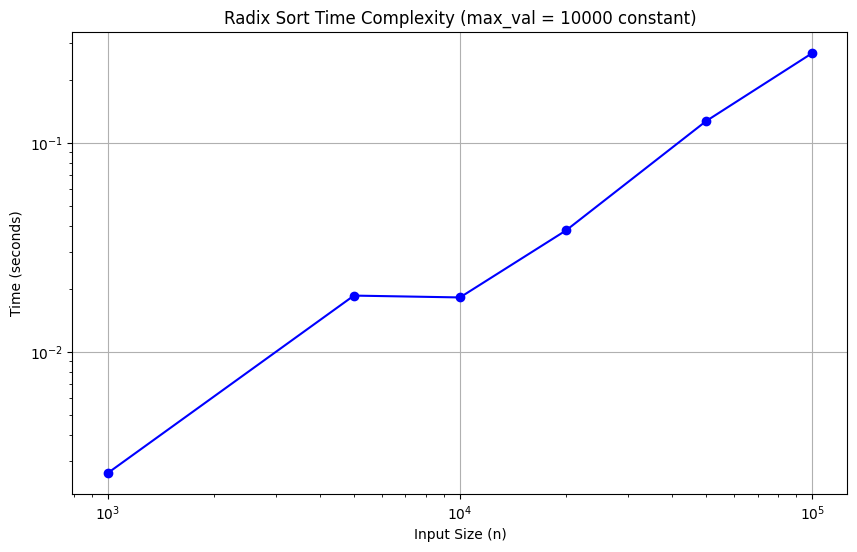


Measuring Radix Sort time with varying max value (and thus k) (fixed n):
Max Value = 100, time = 0.077338 seconds
Max Value = 1000, time = 0.089462 seconds
Max Value = 10000, time = 0.118544 seconds
Max Value = 100000, time = 0.122270 seconds
Max Value = 1000000, time = 0.164139 seconds


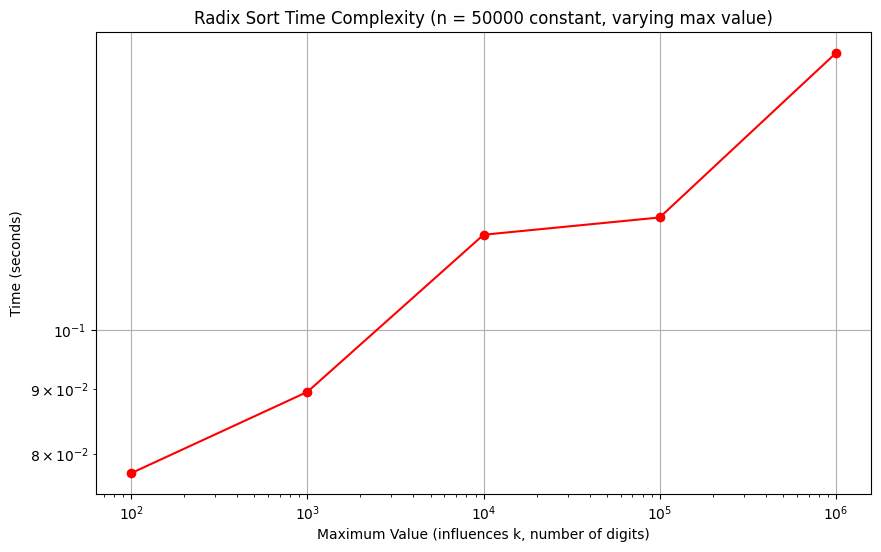

In [3]:
import time
import matplotlib.pyplot as plt
import random

def counting_sort_for_radix(arr, exp):

    n = len(arr)
    output = [0] * n
    count = [0] * 10

    for i in range(n):
        index = (arr[i] // exp) % 10
        count[index] += 1

    for i in range(1, 10):
        count[i] += count[i - 1]

    i = n - 1
    while i >= 0:
        index = (arr[i] // exp) % 10
        output[count[index] - 1] = arr[i]
        count[index] -= 1
        i -= 1

    for i in range(n):
        arr[i] = output[i]

def radixsort(arr):
    """
    Performs Radix Sort on a list of non-negative integers.
    """
    if not arr:
        return []

    max_val = max(arr)

    exp = 1
    while max_val // exp > 0:
        counting_sort_for_radix(arr, exp)
        exp *= 10
    return arr

sample_input_radix = [18, 5, 100, 3, 1, 19, 6, 0, 7, 4, 2]

sorted_sample_radix = radixsort(list(sample_input_radix))
print(f"Radix Sort Sample Input: {sample_input_radix}")
print(f"Radix Sort Sample Output: {sorted_sample_radix}")
print(f"Radix Sort Expected Output: {sorted(sample_input_radix)}")

def measure_time_radixsort(sort_func, arr):
    start_time = time.time()
    sort_func(list(arr))
    end_time = time.time()
    return end_time - start_time

input_sizes_radix = [1000, 5000, 10000, 20000, 50000, 100000]
max_val_constant_radix = 10000
times_n_radix = []

print("\nMeasuring Radix Sort time with varying input sizes:")
for n in input_sizes_radix:
    data_radix = [random.randint(0, max_val_constant_radix) for _ in range(n)]
    time_taken_radix = measure_time_radixsort(radixsort, data_radix)
    times_n_radix.append(time_taken_radix)
    print(f"n = {n}, time = {time_taken_radix:.6f} seconds")

plt.figure(figsize=(10, 6))
plt.plot(input_sizes_radix, times_n_radix, marker='o', linestyle='-', color='blue')
plt.title(f'Radix Sort Time Complexity (max_val = {max_val_constant_radix} constant)')
plt.xlabel('Input Size (n)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.show()

constant_n_radix = 50000
max_val_ranges_radix = [100, 1000, 10000, 100000, 1000000]
times_k_radix = []

print("\nMeasuring Radix Sort time with varying max value (and thus k) (fixed n):")
for max_val_k in max_val_ranges_radix:
    data_k_radix = [random.randint(0, max_val_k) for _ in range(constant_n_radix)]
    time_taken_k_radix = measure_time_radixsort(radixsort, data_k_radix)
    times_k_radix.append(time_taken_k_radix)
    print(f"Max Value = {max_val_k}, time = {time_taken_k_radix:.6f} seconds")

plt.figure(figsize=(10, 6))
plt.plot(max_val_ranges_radix, times_k_radix, marker='o', linestyle='-', color='red')
plt.title(f'Radix Sort Time Complexity (n = {constant_n_radix} constant, varying max value)')
plt.xlabel('Maximum Value (influences k, number of digits)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.show()